<img src="img/make ai logo.png" width="180" height="360" align="right"/>

Actually, we know that when we load dataset, we always using Pandas DataFrame for imported it. Question comes, when you have big data, is it okay to use Pandas? Okay, but it is quite more time to process, even with just imported it. Introduce another package that can helping us to do that, Dask.

Dask provides multi-core execution on larger-than-memory datasets. We can think of dask at a high and a low level

   - High level collections: Dask provides high-level Array, Bag, and DataFrame collections that mimic NumPy, lists, and Pandas but can operate in parallel on datasets that don't fit into main memory. Dask's high-level collections are alternatives to NumPy and Pandas for large datasets.
   - Low Level schedulers: Dask provides dynamic task schedulers that execute task graphs in parallel. These execution engines power the high-level collections mentioned above but can also power custom, user-defined workloads. These schedulers are low-latency (around 1ms) and work hard to run computations in a small memory footprint. Dask's schedulers are an alternative to direct use of threading or multiprocessing libraries in complex cases or other task scheduling systems like Luigi or IPython parallel. 
Source : https://github.com/dask/dask-tutorial


### Dask Delayed
Dask.delayed is a simple and powerful way to parallelize existing code. It allows users to delay function calls into a task graph with dependencies. Dask.delayed doesn’t provide any fancy parallel algorithms like Dask.dataframe, but it does give the user complete control over what they want to build.

Systems like Dask.dataframe are built with Dask.delayed. If you have a problem that is paralellizable, but isn’t as simple as just a big array or a big dataframe, then dask.delayed may be the right choice for you.

For now we want to create simple function to know difference between with ```sleep``` and normal function.

In [1]:
from time import sleep

def inc(x):
    #sleep(1)
    return x + 1

def inc_2(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
inc(2)

3

In [3]:
inc_2(2)

3

In [4]:
x = inc_2(1)
y = inc_2(2)
z = add(x, y)

In [5]:
z

5

So, ```sleep``` has sligtly getting more time to do because they don't process it as like as ```inc()```, so for every function with ```sleep```, they need 1 second to run it.

In [6]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=2, memory_limit='4GB')
client

Client Scheduler: inproc://192.168.1.240/7608/1 Dashboard: http://localhost:8787/status,Cluster Workers: 2 Cores: 8 Memory: 8.00 GB


In [7]:
from dask import delayed

In [8]:
x = delayed(inc_2)(1)
y = delayed(inc_2)(2)
z = delayed(add)(x, y)

In [ ]:
x

In [9]:
y

Delayed('inc_2-36f06f14-96e8-49a5-828b-0d7fa56f67ec')

In [10]:
z

Delayed('add-0b013d5b-bbf6-4125-a782-986a30c9cdb9')

In [11]:
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

In [12]:
z.compute()

5

Actually when using Dask.delayed, it can be faster but the output is still delayed, we should running ```compute()``` to get value.

In [ ]:
z.compute()

If you want to visualize how it is working, you can using ```visualize``` function.

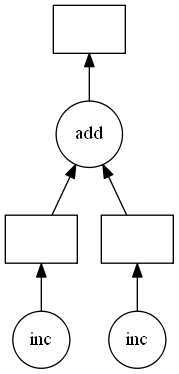

In [13]:
z.visualize()

In [15]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []
for x in data:
    y = inc_2(x)
    results.append(y)
    
total = sum(results)
total

65

In [16]:
results = []

for x in data:
    y = delayed(inc_2)(x)
    results.append(y)
    
total = delayed(sum)(results)
#print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
#print("After computing :", result) # After it's computed
result

65

For looping, we can say that using Dask is much faster then using normal function.

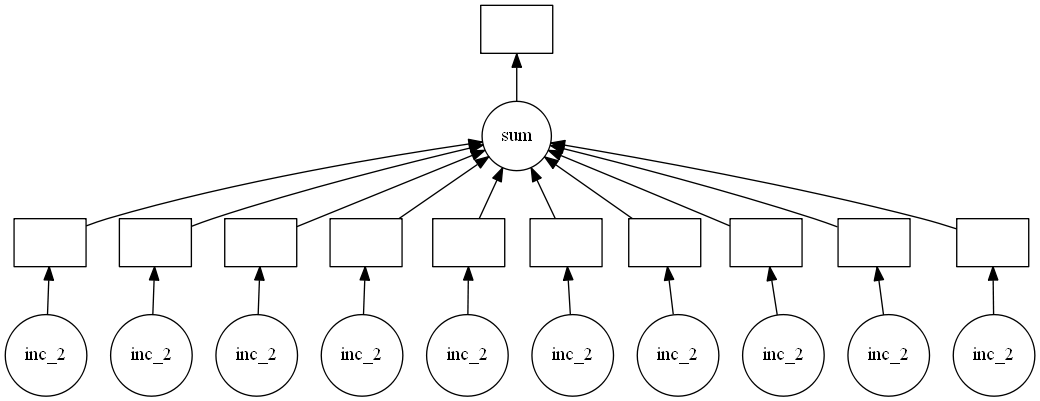

In [17]:
total.visualize()

Now you know that Dask is running parallel while in others using sequential, this is the reason why Dask is slightly faster than other, even with ```sleep``` function too. Let's compare how long you import data with **Pandas** and **Dask**.

In [18]:
import pandas as pd
%time temp = pd.read_csv("data/train_santander.csv") 

Wall time: 17.3 s


In [20]:
import dask.dataframe as dd
%time df   = dd.read_csv("data/train_santander.csv")

Wall time: 220 ms


### Why Using Dask?
Dask can efficiently perform parallel computations on a single machine using multi-core CPUs. For example, if you have a quad core processor, Dask can effectively use all 4 cores of your system simultaneously for processing. In order to use lesser memory during computations, Dask stores the complete data on the disk, and uses chunks of data (smaller parts, rather than the whole data) from the disk for processing. During the processing, the intermediate values generated (if any) are discarded as soon as possible, to save the memory consumption.

It was so much time saved, right? With **Dask**, you can get faster to load than with **Pandas**.

Actually, when you are doing good with Pandas, congrats, you can do your function in Dask as well. Example :

In [21]:
df['target'].value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: target, dtype: int64
Dask Name: value-counts-agg, 26 tasks

Again, always using ```compute()``` if you want to know what it is in your data.

In [22]:
df['target'].value_counts().compute()

0    179902
1     20098
Name: target, dtype: int64

### Dask Array
Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms. Simply put: distributed Numpy. Dask Array implements a subset of the NumPy ndarray interface using blocked algorithms, cutting up the large array into many small arrays. This lets us compute on arrays larger than memory using all of our cores. We coordinate these blocked algorithms using Dask graphs.

   - Parallel: Uses all of the cores on your computer
   - Larger-than-memory: Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
   - Blocked Algorithms: Perform large computations by performing many smaller computations


In [23]:
import dask.array as da    
#using arange to create an array with values from 0 to 10
X = da.arange(100, chunks=2)
#to see size of each chunk
X.chunks

((2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2),)

In [24]:
X.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Dask Bags

Dask Bag implements operations like map, filter, groupby and aggregations on collections of Python objects. It does this in parallel and in small memory using Python iterators. It is similar to a parallel version of itertools or a Pythonic version of the PySpark RDD.

Dask Bags are often used to do simple preprocessing on log files, JSON records, or other user defined Python objects.

Source : https://examples.dask.org/bag.html

In [25]:
import dask
import json
import os

os.makedirs('data', exist_ok=True)              # Create data/ directory

b = dask.datasets.make_people()                 # Make records of people
b.map(json.dumps).to_textfiles('data/*.json')   # Encode as JSON, write to disk

['data/0.json',
 'data/1.json',
 'data/2.json',
 'data/3.json',
 'data/4.json',
 'data/5.json',
 'data/6.json',
 'data/7.json',
 'data/8.json',
 'data/9.json']

In [26]:
import dask.bag as db
import json

b = db.read_text('data/*.json').map(json.loads)
b

dask.bag<map-loa..., npartitions=10>

In [27]:
b.take(1)

({'age': 60,
  'name': ['Shantay', 'Talley'],
  'occupation': 'Employment',
  'telephone': '1-295-689-4147',
  'address': {'address': '270 Saint Croix Crescent',
   'city': 'San Luis Obispo'},
  'credit-card': {'number': '3471 842317 85068', 'expiration-date': '03/22'}},)

In [28]:
def flatten(record):
    return {
        'age': record['age'],
        'occupation': record['occupation'],
        'telephone': record['telephone'],
        'credit-card-number': record['credit-card']['number'],
        'credit-card-expiration': record['credit-card']['expiration-date'],
        'name': ' '.join(record['name']),
        'street-address': record['address']['address'],
        'city': record['address']['city']
    }

In [29]:
b.map(flatten).take(1)

({'age': 60,
  'occupation': 'Employment',
  'telephone': '1-295-689-4147',
  'credit-card-number': '3471 842317 85068',
  'credit-card-expiration': '03/22',
  'name': 'Shantay Talley',
  'street-address': '270 Saint Croix Crescent',
  'city': 'San Luis Obispo'},)

In [30]:
df = b.map(flatten).to_dataframe()
df.head()

,age,city,credit-card-expiration,credit-card-number,name,occupation,street-address,telephone
0,60,San Luis Obispo,03/22,3471 842317 85068,Shantay Talley,Employment,270 Saint Croix Crescent,1-295-689-4147
1,55,Everett,07/17,4561 4928 8096 0853,Yelena Levy,Accounts Assistant,1100 Leese Freeway,533-379-2273
2,40,Rocky Mount,06/17,4982 7424 4465 3936,Gabriel Murphy,Leaflet Distributor,254 San Juan Townline,(116) 141-3646
3,35,Danville,10/23,2321 2713 6778 9414,Siu Barr,Packer,689 Battery Wagner Row,230-347-3864
4,24,Point Pleasant,11/18,2535 4451 4657 4774,Spring Newman,Masseur,858 Prescott Manor,(760) 471-1980


In [31]:
df.size.compute()

80000

In [32]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 8 entries, age to telephone
dtypes: object(7), int64(1)

In [33]:
df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 999
Data columns (total 8 columns):
age                       10000 non-null int64
city                      10000 non-null object
credit-card-expiration    10000 non-null object
credit-card-number        10000 non-null object
name                      10000 non-null object
occupation                10000 non-null object
street-address            10000 non-null object
telephone                 10000 non-null object
dtypes: int64(1), object(7)
memory usage: 703.1+ KB


In [34]:
df[df.age > 30].occupation.value_counts().nlargest(10).compute()

Warehouseman           13
Wood Carver            13
Marquee Erector        13
Gambler                13
Health Therapist       13
Premises Security      13
Carphone Fitter        13
Sales Support          13
Signalman              13
Research Consultant    12
Name: occupation, dtype: int64

### Dask DataFrame
Dask Dataframes coordinate many Pandas dataframes, partitioned along an index. They support a large subset of the Pandas API. A large pandas dataframe splits row-wise to form multiple smaller dataframes. These smaller dataframes are present on a disk of a single machine, or multiple machines (thus allowing to store datasets of size larger than the memory). Each computation on a Dask dataframe parallelizes operations on the existing pandas dataframes.

Source: 
- https://examples.dask.org/dataframe.html
- https://www.analyticsvidhya.com/blog/2018/08/dask-big-datasets-machine_learning-python/

In [35]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 8 entries, age to telephone
dtypes: object(7), int64(1)

In [36]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


From ```info()``` function we can saw that in `temp` format of data is **Pandas DataFrame**, while `df` is **Dask DataFrame** format.

Now we are going to create Dask Data Frame, with so many rows.

In [37]:
import dask
import dask.dataframe as dd
df = dask.datasets.timeseries()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:91: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=partition_freq))
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


Check our data, use `compute()` function.

In [38]:
df.compute()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1010,Ray,0.707847,-0.544003
2000-01-01 00:00:01,971,Hannah,0.409106,0.027453
2000-01-01 00:00:02,1037,Edith,0.534175,0.059859
2000-01-01 00:00:03,973,Jerry,-0.186700,0.445386
2000-01-01 00:00:04,1004,Ray,-0.394181,0.576995
2000-01-01 00:00:05,964,George,0.606526,-0.021333
2000-01-01 00:00:06,950,Zelda,0.916170,0.543310
2000-01-01 00:00:07,977,Patricia,0.640030,-0.462056
2000-01-01 00:00:08,979,Dan,0.415498,0.503573


Check type of data.

In [39]:
df.dtypes

id        int32
name     object
x       float64
y       float64
dtype: object

In [40]:
import pandas as pd
pd.options.display.precision = 2
pd.options.display.max_rows = 100

In [41]:
df.head(99)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1010,Ray,0.71,-5.44e-01
2000-01-01 00:00:01,971,Hannah,0.41,2.75e-02
2000-01-01 00:00:02,1037,Edith,0.53,5.99e-02
2000-01-01 00:00:03,973,Jerry,-0.19,4.45e-01
2000-01-01 00:00:04,1004,Ray,-0.39,5.77e-01
2000-01-01 00:00:05,964,George,0.61,-2.13e-02
2000-01-01 00:00:06,950,Zelda,0.92,5.43e-01
2000-01-01 00:00:07,977,Patricia,0.64,-4.62e-01
2000-01-01 00:00:08,979,Dan,0.42,5.04e-01


We can manipulate our data as like as Pandas DataFrame.

In [42]:
df2 = df[df.y > 0]
df3 = df2.groupby('name').x.std()
df3

Dask Series Structure:
npartitions=1
    float64
        ...
Name: x, dtype: float64
Dask Name: sqrt, 157 tasks

In [43]:
df3.head()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


name
Alice      0.58
Bob        0.58
Charlie    0.58
Dan        0.58
Edith      0.58
Name: x, dtype: float64

Check your type of data.

In [44]:
df3.compute()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


name
Alice       0.58
Bob         0.58
Charlie     0.58
Dan         0.58
Edith       0.58
Frank       0.58
George      0.58
Hannah      0.58
Ingrid      0.58
Jerry       0.58
Kevin       0.58
Laura       0.58
Michael     0.58
Norbert     0.58
Oliver      0.58
Patricia    0.58
Quinn       0.58
Ray         0.58
Sarah       0.58
Tim         0.58
Ursula      0.58
Victor      0.58
Wendy       0.58
Xavier      0.58
Yvonne      0.58
Zelda       0.58
Name: x, dtype: float64

Actually, you can check your progress with Dask Dashboard.

<img src="img/new_dashboard.gif" width="720" height="720" align="center"/>


In [45]:
type(df3)

dask.dataframe.core.Series

In [46]:
type(df3.compute())

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


pandas.core.series.Series

We can create visualization from Dask DataFrame, with Matplotlib.

In [47]:
%matplotlib inline

In [48]:
df[['x', 'y']].resample('1h').mean().head()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


,x,y
timestamp,,
2000-01-01 00:00:00,8.43e-03,-3.18e-04
2000-01-01 01:00:00,3.79e-03,-4.94e-03
2000-01-01 02:00:00,-4.90e-03,-1.46e-02
2000-01-01 03:00:00,8.08e-03,6.48e-03
2000-01-01 04:00:00,1.26e-03,1.36e-02


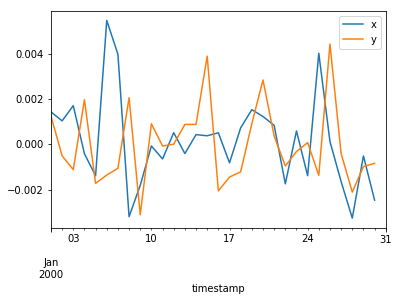

In [49]:
df[['x', 'y']].resample('24h').mean().compute().plot()

----

### Dask ML

In [50]:
df.head()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\io\demo.py:45: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, end=end, freq=freq, name='timestamp')


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1010,Ray,0.71,-0.54
2000-01-01 00:00:01,971,Hannah,0.41,0.03
2000-01-01 00:00:02,1037,Edith,0.53,0.06
2000-01-01 00:00:03,973,Jerry,-0.19,0.45
2000-01-01 00:00:04,1004,Ray,-0.39,0.58


We are using Santander dataset for this to create prediction.

In [54]:
import dask.dataframe as dd
train   = dd.read_csv("data/train_santander.csv")
test    = dd.read_csv("data/test_santander.csv")

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = train.drop(['ID_code','target'], axis = 1)
y = train['target']

In [71]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegressionCV
from dask_ml.wrappers import ParallelPostFit

In [72]:
clf = ParallelPostFit(LogisticRegression(solver='saga'))

In [73]:
clf.fit(X, y)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


ParallelPostFit(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
        scoring=None)

In [74]:
go = test.drop(['ID_code'], axis = 1)

In [82]:
tar = clf.predict(go).compute()

In [81]:
goal = test['ID_code'].values.compute()

In [83]:
saving = pd.DataFrame({'ID_code':goal,
                      'target':tar})

In [86]:
saving.to_csv("submission.csv", index=False)

---

In [60]:
import numpy as np
import dask.array as da
from sklearn.datasets import make_classification

In [61]:
X_train, y_train = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    random_state=1, n_clusters_per_class=1, n_samples=5000)
X_train[:5]

array([[ 0.61845234, -0.57786547],
       [ 0.63814928,  0.99202569],
       [ 1.90002662,  0.41916516],
       [-1.85520411,  1.8835674 ],
       [ 0.83936546,  0.91427026]])

In [62]:
# Scale up: increase N, the number of times we replicate the data.
N = 1000
X_large = da.concatenate([da.from_array(X_train, chunks=X_train.shape) for _ in range(N)])
y_large = da.concatenate([da.from_array(y_train, chunks=y_train.shape) for _ in range(N)])
X_large

dask.array<concatenate, shape=(5000000, 2), dtype=float64, chunksize=(5000, 2)>

In [63]:
from sklearn.linear_model import LogisticRegressionCV
from dask_ml.wrappers import ParallelPostFit

In [64]:
clf = ParallelPostFit(LogisticRegressionCV(cv=3))

In [65]:
clf.fit(X, y)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


KeyboardInterrupt: 

In [66]:
clf = ParallelPostFit(LogisticRegressionCV(cv=3))

In [67]:
clf.fit(X_train, y_train)

ParallelPostFit(estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0),
        scoring=None)

In [68]:
y_pred = clf.predict(X)
y_pred

dask.array<_predict, shape=(nan,), dtype=int32, chunksize=(nan,)>

In [69]:
len(clf.predict(X).compute())

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply_and_enforce at 0x0000022597A76AE8>, <function _predict at 0x00000225B556AD90>, [(<function apply_and_enforce at 0x0000022597A76AE8>, <methodcaller: drop>, [(<function check_meta at 0x00000225973D92F0>, (<function apply at 0x0000022590BC7BF8>, <function pandas_read_text at 0x000002259747EC80>, [<function _make_parser_function.<locals>.parser_f at 0x00000225931980D0>, (<function read_block_from_file at 0x00000225973D9400>, <dask.bytes.core.OpenFile object at 0x00000225B8202DD8>, 256000000, 64000000, b'\n'), b'ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_

ValueError: X has 200 features per sample; expecting 2

In [70]:
clf.score(X,y)

ValueError: X has 200 features per sample; expecting 2

In [83]:
clf.predict_proba(X).compute()

array([[0.98119843, 0.01880157],
       [0.435077  , 0.564923  ],
       [0.94795658, 0.05204342],
       ...,
       [0.89006305, 0.10993695],
       [0.98238909, 0.01761091],
       [0.99371548, 0.00628452]])

In [84]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [85]:
X, y = dask_ml.datasets.make_blobs(n_samples=1000000,
                                   chunks=100000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2)>

In [86]:
X.compute()

array([[ 1.56480683,  4.61915895],
       [ 1.7614225 ,  1.64612104],
       [ 0.56768535,  5.0960709 ],
       ...,
       [ 0.8656262 ,  4.35142233],
       [ 0.85475307, -1.05151048],
       [ 0.61304523,  3.24756572]])

In [88]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import sklearn.datasets

In [89]:
X, y = sklearn.datasets.make_classification(n_samples=1_000, n_features=20)

In [92]:
X,y

(array([[-0.3549849 , -0.50603703, -0.28024475, ...,  0.48719948,
          0.47628035, -0.15489014],
        [-1.0373415 ,  0.36900787, -0.30520824, ...,  0.55792915,
          1.28581484, -0.31405997],
        [-1.51282842,  0.12583975,  0.10240216, ..., -0.94678601,
         -0.52332613, -0.17554839],
        ...,
        [-1.23322893, -0.38889876,  0.10179898, ...,  0.12448171,
         -0.16823919, -1.35660518],
        [ 1.81649021,  0.00605512,  0.01965911, ..., -0.31437927,
          1.98439777, -0.44915713],
        [-0.635576  , -0.75078754, -0.35357372, ...,  0.61481934,
         -0.39700966, -1.16109572]]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
   

In [100]:
classifiers = [
    ('sgd', SGDClassifier(max_iter=1000)),
    ('logisticregression', LogisticRegression()),
    ('svc', SVC(gamma='auto')),
]
clf = VotingClassifier(classifiers, n_jobs=-1)

In [94]:
clf.fit(X, y)

VotingClassifier(estimators=[('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
   ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [96]:
from sklearn.externals import joblib

In [101]:
with joblib.parallel_backend("dask"):
    clf.fit(X, y)

print(clf)

VotingClassifier(estimators=[('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
   ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)


C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [98]:
clf.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,

In [99]:
clf.score(X,y)

0.933

### Automate Machine Learning with TPOT
TPOT is an automated machine learning library. It evaluates many scikit-learn pipelines and hyperparameter combinations to find a model that works well for your data. Evaluating all these computations is computationally expensive, but ammenable to parallelism. TPOT can use Dask to distribute these computations on a cluster of machines.

In [102]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [103]:
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    train_size=0.05,
    test_size=0.95,
)

In [104]:
tp = TPOTClassifier(
    generations=2,
    population_size=10,
    cv=2,
    n_jobs=-1,
    random_state=0,
    verbosity=0,
    use_dask=True
)

In [105]:
tp.fit(X_train, y_train)

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=2,
        disable_update_check=False, early_stop=None, generations=2,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=10,
        random_state=0, scoring=None, subsample=1.0, use_dask=True,
        verbosity=0, warm_start=False)

In [106]:
tp.cv

2

In [109]:
tp.classification

True

In [112]:
tp.predict(X_test)

array([3, 7, 1, ..., 0, 0, 0])

In [113]:
tp.score(X_test, y_test)

0.8612412177985949

In [116]:
tp = TPOTClassifier(scoring='f1')

In [118]:
tp.fit(X_train,y_train)

RuntimeError: There was an error in the TPOT optimization process. This could be because the data was not formatted properly, or because data for a regression problem was provided to the TPOTClassifier object. Please make sure you passed the data to TPOT correctly.